# **IMPORTS**

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

## **SETTINGS**
---

In [82]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [83]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [84]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

---

# **DATAFRAME**

In [85]:
path= "data/cleaned_data.csv"
data= pd.read_csv(path)

In [86]:
df= pd.DataFrame(data)
df.head(3)

,ISRC,Track,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0,0
1,USUG12400910,Not Like Us,Kendrick Lamar,2024-05-04,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,674700.0,35223547.0,2.083390e+08,156380351.0,1
2,QZJ842400387,i like the way you kiss me,Artemas,2024-03-19,538.4,601309283.0,54331.0,211607669.0,92.0,122599116.0,2228730.0,3025400.0,275154237.0,3.369121e+09,373784955.0,0


---

### Simple Checking / Understanding the data

In [87]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 4576
Columns: 16


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISRC                    4576 non-null   object 
 1   Track                   4576 non-null   object 
 2   Artist                  4575 non-null   object 
 3   Release Date            4576 non-null   object 
 4   Track Score             4576 non-null   float64
 5   Spotify Streams         4485 non-null   float64
 6   Spotify Playlist Count  4528 non-null   float64
 7   Spotify Playlist Reach  4526 non-null   float64
 8   Spotify Popularity      3794 non-null   float64
 9   YouTube Views           4290 non-null   float64
 10  YouTube Likes           4283 non-null   float64
 11  TikTok Posts            3425 non-null   float64
 12  TikTok Likes            3618 non-null   float64
 13  TikTok Views            3617 non-null   float64
 14  YouTube Playlist Reach  3589 non-null   

>We have few null values on columns like `Spotify Popularity`, the `TikTok` columns and `YouTube Playlist Reach`. But it doesn't affect our research too much since we have enough data.

In [89]:
df.eq(" ").sum()

ISRC                      0
Track                     0
Artist                    0
Release Date              0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
YouTube Views             0
YouTube Likes             0
TikTok Posts              0
TikTok Likes              0
TikTok Views              0
YouTube Playlist Reach    0
Explicit Track            0
dtype: int64

## Data Completeness
- Total rows (after cleaning): ~4,500  
- Key metrics have high but varying completeness:
  - `Spotify Streams`: 4,485 non-null
  - `YouTube Views`: 4,290 non-null
  - `TikTok Views`: 3,617 non-null
- Other columns (e.g., `Spotify Popularity`, `YouTube Playlist Reach`) have moderate missingness but remain usable for subset analyses ~~seen before on df.info()~~.

In [90]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Track Score,4576.0,4.186000e+01,3.862000e+01,19.4,23.30,29.9,4.450000e+01,7.254000e+02
Spotify Streams,4485.0,4.474069e+08,5.385504e+08,1071.0,70354552.00,239850720.0,6.291025e+08,4.281469e+09
Spotify Playlist Count,4528.0,5.939751e+04,7.114560e+04,1.0,6705.00,32312.5,8.608325e+04,5.903920e+05
Spotify Playlist Reach,4526.0,2.335177e+07,2.969279e+07,1.0,4789848.50,13264111.5,2.966802e+07,2.623434e+08
Spotify Popularity,3794.0,6.350000e+01,1.619000e+01,1.0,61.00,67.0,7.300000e+01,9.600000e+01
YouTube Views,4290.0,4.027841e+08,7.020105e+08,913.0,40756124.25,148269610.0,4.646921e+08,1.632276e+10
YouTube Likes,4283.0,2.930659e+06,4.594517e+06,25.0,409749.50,1257935.0,3.575526e+06,6.231118e+07
TikTok Posts,3425.0,9.448117e+05,2.442704e+06,1.0,38115.00,182529.0,7.956030e+05,4.290000e+07
TikTok Likes,3618.0,1.126902e+08,5.499597e+08,3.0,5810119.50,26576921.5,9.333136e+07,2.347422e+10
TikTok Views,3617.0,1.161724e+09,5.883161e+09,19.0,58980168.00,266064027.0,9.145973e+08,2.332323e+11


## Core Metadata

| Column | Type | Description |
|--------|------|-------------|
| **ISRC** | String (Index) | International Standard Recording Code — a unique identifier for sound recordings. Used as the dataset index. |
| **Track** | String | Title of the song. |
| **Artist** | String | Primary artist or group name. May be missing (`NaN`) for a small number of entries. |
| **Release Date** | DateTime | Official release date of the track (formatted as `YYYY-MM-DD`). |
| **Track Score** | Float | Composite score (0–1000+) reflecting overall popularity and cross-platform performance. |
| **Explicit Track** | Boolean (0/1) | Flag indicating explicit content: `1` = explicit, `0` = clean. |

---

## Spotify Metrics

| Column | Type | Description |
|--------|------|-------------|
| **Spotify Streams** | Float | Total number of on-demand audio streams on Spotify. |
| **Spotify Playlist Count** | Float | Number of Spotify playlists the track appears in. |
| **Spotify Playlist Reach** | Float | Estimated total number of unique users who saw the track in a Spotify playlist. |
| **Spotify Popularity** | Float | Spotify’s internal popularity index (0–100), where 100 = most popular. Updated frequently. |

---

## YouTube Metrics

| Column | Type | Description |
|--------|------|-------------|
| **YouTube Views** | Float | Total number of views on the official or primary YouTube video. |
| **YouTube Likes** | Float | Total number of likes on the YouTube video. |
| **YouTube Playlist Reach** | Float | Estimated number of unique users who saw the track in a YouTube playlist or recommendation. |

---

## TikTok Metrics

| Column | Type | Description |
|--------|------|-------------|
| **TikTok Views** | Float | Total number of views of videos using this track as audio. |
| **TikTok Likes** | Float | Total likes on TikTok videos using this audio. |
| **TikTok Posts** | Float | Number of TikTok videos created using this track. |

---

### Separating numerical columns and categorical columns

In [91]:
# Explicit Track is numerical type, so we change it first to bool
df["Explicit Track"]= df["Explicit Track"].astype(bool)

In [92]:
df["Release Date"]= pd.to_datetime(df["Release Date"], errors= "coerce")
df["Release Date"].dtype

dtype('<M8[ns]')

In [93]:
# Getting categorical columns [strings, bools, categories]
cat_cols = df.select_dtypes(include=["object", "bool", "category", "datetime64[ns]"])

# Getting numerical columns [floats]
num_cols= df.select_dtypes(include= "number").select_dtypes(exclude="bool")

In [94]:
print(f"Categorical columns: {cat_cols.columns}\n\nNumerical columns: {num_cols.columns}")

Categorical columns: Index(['ISRC', 'Track', 'Artist', 'Release Date', 'Explicit Track'], dtype='object')

Numerical columns: Index(['Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach'],
      dtype='object')


In [95]:
# To see it better
cat_cols.head(3)

,ISRC,Track,Artist,Release Date,Explicit Track
0,QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,False
1,USUG12400910,Not Like Us,Kendrick Lamar,2024-05-04,True
2,QZJ842400387,i like the way you kiss me,Artemas,2024-03-19,False


In [96]:
# To see it better
num_cols.head(3)

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach
0,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0
1,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,674700.0,35223547.0,2.083390e+08,156380351.0
2,538.4,601309283.0,54331.0,211607669.0,92.0,122599116.0,2228730.0,3025400.0,275154237.0,3.369121e+09,373784955.0


---

# Questions
### About music and their relationship across all platforms, we can search for very value information:

1. Which are the top 10 songs / artists on spotify

2. How does TikTok engagement correlate with traditional streaming platform success?

3. Which artists demonstrate the most effective multi-platform presence strategies?

---

### Which are the top 10 songs / artists on spotify (Univariate analysis)

First, what exactly we want to prove by this? We want to search wich artists and songs are the most popular and, furthermore, how they're correlated to multiples platforms and extract enought information about how these hits get more or less relevant cross-platform.

We started with a simple analysis, getting the Mean, Median and Standard; the concentration and the IQR so we can choose wisely our next step

In [97]:
# FUNC. TO DEEP ANALYZE THE TOP10 ARTISTS AND SONGS

def top_10_analysis(df, platform_col, entity_col="Artist", top_n=10):
  top_entities= df.nlargest(top_n, platform_col)

  print(f"Detailed analysis - TOP {top_n} - {entity_col} in {platform_col}")
  print("="*40)

  # Basic stats
  total_value=  top_entities[platform_col].sum()
  mean_value=   top_entities[platform_col].mean()
  median_value= top_entities[platform_col].median()
  std_value=    top_entities[platform_col].std()

  print(f"TOP 10\n\
        - Total:    {total_value}\n\
        - Mean:     {mean_value}\n\
        - Median:   {median_value}\n\
        - Standard: {std_value}\n")
  
  # Top concentration
  overall_total= df[platform_col].sum()
  top_concentration= (total_value / overall_total) *100 # percentage
  print(f"- Concentration: {top_concentration:.2f}% of the total {platform_col}")

  # Variability
  Q1= top_entities[platform_col].quantile(0.25)
  Q3= top_entities[platform_col].quantile(0.75)
  IQR= Q3- Q1
  print(f"- IQR: {IQR:.2f}")
  print("="*40)
  
  return top_entities

In [98]:
df.head(1)

,ISRC,Track,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0,False


In [99]:
# Spotify Analysis
print(f"SPOTIFY ANALYSIS")
sptify_top_10_analysis= top_10_analysis(df, "Spotify Streams", "Artist")

SPOTIFY ANALYSIS
Detailed analysis - TOP 10 - Artist in Spotify Streams
TOP 10
        - Total:    36211178457.0
        - Mean:     3621117845.7
        - Median:   3393101480.0
        - Standard: 422331073.57321316

- Concentration: 1.80% of the total Spotify Streams
- IQR: 604417704.50


In [100]:
# YouTube Analysis
print(f"YOUTUBE ANALYSIS")
sptify_top_10_analysis= top_10_analysis(df, "YouTube Views", "Artist")

YOUTUBE ANALYSIS
Detailed analysis - TOP 10 - Artist in YouTube Views
TOP 10
        - Total:    74967403540.0
        - Mean:     7496740354.0
        - Median:   6404844290.0
        - Standard: 3393600459.844705

- Concentration: 4.34% of the total YouTube Views
- IQR: 1999138491.50


In [101]:
# TikTok Analysis
print(f"TIKTOK ANALYSIS")
sptify_top_10_analysis= top_10_analysis(df, "TikTok Views", "Artist")

TIKTOK ANALYSIS
Detailed analysis - TOP 10 - Artist in TikTok Views
TOP 10
        - Total:    723649021511.0
        - Mean:     72364902151.1
        - Median:   33615095166.5
        - Standard: 80743872949.69705

- Concentration: 17.22% of the total TikTok Views
- IQR: 26084835530.25


| Metric | Spotify | YouTube | TikTok |
|--------|---------|---------|---------|
| **Total Top 10** | 36.2B streams | 75.0B views | 723.6B views |
| **Mean** | 3.62B | 7.50B | 72.36B |
| **Median** | 3.39B | 6.40B | 33.62B |
| **Standard Deviation** | 422M | 3.39B | 80.74B |
| **Concentration** | 1.80% | 4.34% | 17.22% |
| **IQR** | 604M | 2.00B | 26.08B |

#### Spotify Characteristics:
- **Lowest Concentration** (1.80%) - Most democratic platform
- **High Stability** - Small standard deviation relative to mean
- **Balanced Distribution** - Mean and median are close
- **Healthy Long-tail** - Diverse artist ecosystem

#### YouTube Characteristics:
- **Moderate Concentration** (4.34%) - 2.4x more concentrated than Spotify
- **Higher Variability** - Standard deviation 8x larger than Spotify
- **Visual-driven Consumption** - Video content amplifies reach
- **Mixed Economy** - Balance between music and viral content

#### TikTok Characteristics:
- **Extreme Concentration** (17.22%) - 9.6x more concentrated than Spotify
- **Massive Scale** - Views 10-20x higher than other platforms
- **High Volatility** - Enormous standard deviation indicates viral hits
- **Winner-takes-all** - Extreme skew between mean and median

---



### Concentration Spectrum:
```
Low Concentration ←──────────────────→ High Concentration
Spotify (1.80%) → YouTube (4.34%) → TikTok (17.22%)
```

### Platform Stability:
```
Most Stable ←──────────────────────→ Most Volatile
Spotify → YouTube → TikTok
```

### Audience Behavior:
- **Spotify**: Intentional listening, complete tracks
- **YouTube**: Mixed intentional/discovery, visual engagement
- **TikTok**: Algorithmic discovery, snippet consumption

---

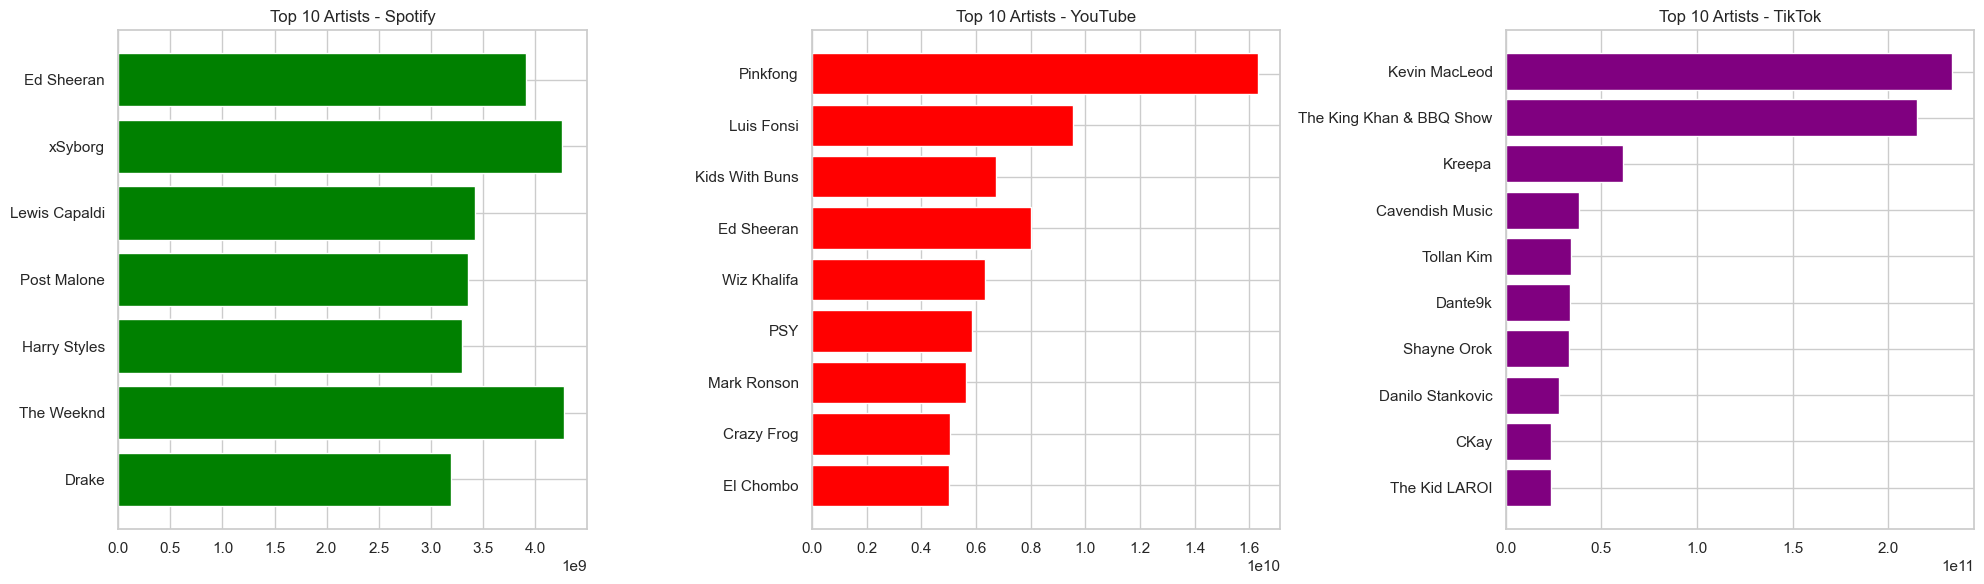

In [129]:
fig, axes= plt.subplots(1, 3, figsize=(20, 6))

# Spotify
spotify_artists= df.nlargest(10, "Spotify Streams").sort_values("Spotify Streams", ascending=True)
axes[0].barh(spotify_artists["Artist"], spotify_artists["Spotify Streams"], color="green")
axes[0].set_title("Top 10 Artists - Spotify")

# YouTube
youtube_artists= df.nlargest(10, "YouTube Views").sort_values("YouTube Views", ascending=True)
axes[1].barh(youtube_artists["Artist"], youtube_artists["YouTube Views"], color="red")
axes[1].set_title("Top 10 Artists - YouTube")

# TikTok
tiktok_artists= df.nlargest(10, "TikTok Views").sort_values("TikTok Views", ascending=True)
axes[2].barh(tiktok_artists["Artist"], tiktok_artists["TikTok Views"], color="purple")
axes[2].set_title("Top 10 Artists - TikTok")

plt.tight_layout()
plt.show()

#### Top Artists by Platform

- **Spotify**: Dominated by global pop stars — The Weeknd, Ed Sheeran, Drake.  
- **YouTube**: Mix of viral hits and legacy artists — Pinkfong (Baby Shark), Luis Fonsi, Ed Sheeran.  
- **TikTok**: Heavily skewed toward instrumental or background tracks — Kevin MacLeod, The King Khan & BBQ Show.

>TikTok’s top artists are often not mainstream musicians, reflecting its role as a content engine rather than a traditional music platform.

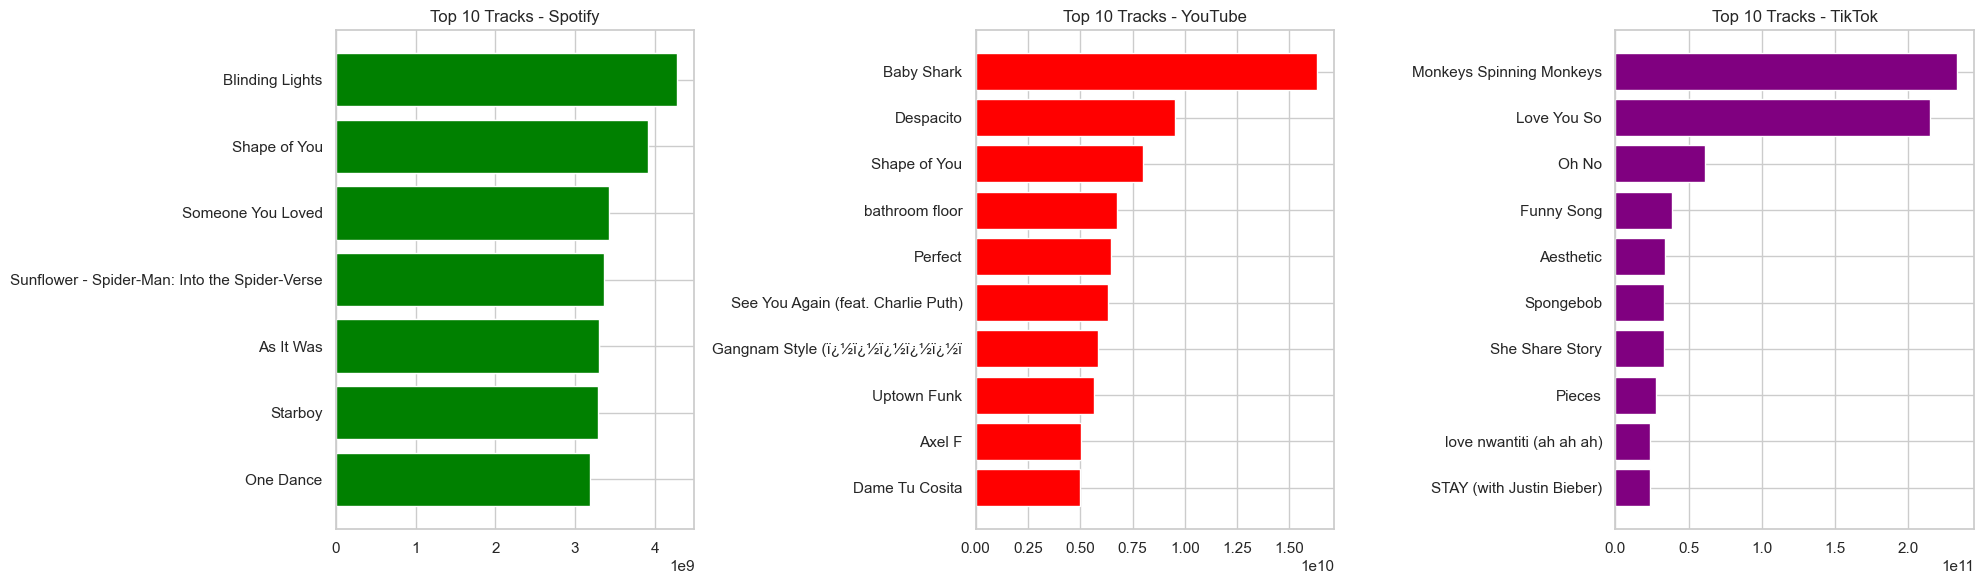

In [103]:
fig, axes= plt.subplots(1, 3, figsize=(20, 6))

# Spotify
spotify_tracks= df.nlargest(10, "Spotify Streams").sort_values("Spotify Streams", ascending=True)
axes[0].barh(spotify_tracks["Track"], spotify_tracks["Spotify Streams"], color="green")
axes[0].set_title("Top 10 Tracks - Spotify")

# YouTube
youtube_tracks= df.nlargest(10, "YouTube Views").sort_values("YouTube Views", ascending=True)
axes[1].barh(youtube_tracks["Track"], youtube_tracks["YouTube Views"], color="red")
axes[1].set_title("Top 10 Tracks - YouTube")

# TikTok
tiktok_tracks= df.nlargest(10, "TikTok Views").sort_values("TikTok Views", ascending=True)
axes[2].barh(tiktok_tracks["Track"], tiktok_tracks["TikTok Views"], color="purple")
axes[2].set_title("Top 10 Tracks - TikTok")

plt.tight_layout()
plt.show()

#### Top Songs by Platform

- **Spotify**: Pop anthems and radio-friendly hits — Blinding Lights, Shape of You, Someone You Loved.  
- **YouTube**: Viral, family-oriented, or meme-driven videos — Baby Shark, Despacito, Gangnam Style.  
- **TikTok**: Instrumentals or audio loops for trends — Monkeys Spinning Monkeys, Love You So, Oh No.

>Cross-platform hits like “Shape of You” appear in Spotify and YouTube top 10s but rarely in TikTok’s, which favors non-vocal or reusable audio.

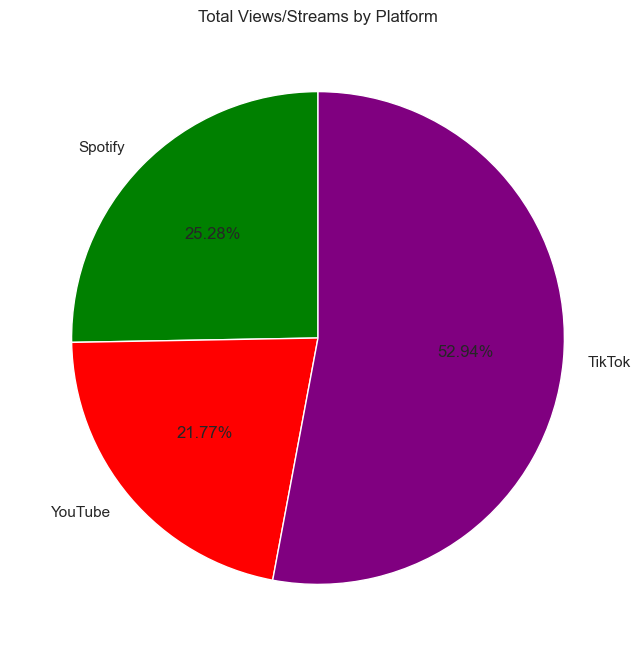

In [104]:
total_spotify= df["Spotify Streams"].sum()
total_youtube= df["YouTube Views"].sum()
total_tiktok= df["TikTok Views"].sum()

platforms= ["Spotify", "YouTube", "TikTok"]
totals= [total_spotify, total_youtube, total_tiktok]
colors= ["green", "red", "purple"]

plt.figure(figsize=(8, 8))
plt.pie(totals, labels=platforms, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Total Views/Streams by Platform")
plt.show()

#### Total Engagement by Platform (Pie Chart)

- **TikTok**: 52.94% of total views/streams — the dominant platform by volume.  
- **Spotify**: 25.28% — strong audio streaming presence.  
- **YouTube**: 21.77% — significant, but less than half of TikTok’s scale.

>TikTok’s massive share reflects its algorithmic virality and short-form content model, where views accumulate rapidly across millions of user-generated clips.

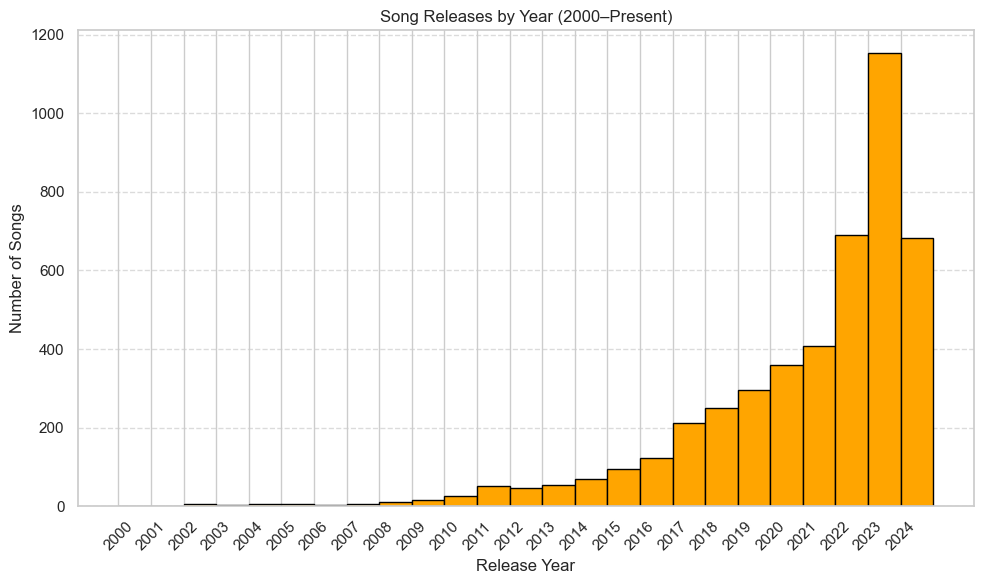

In [105]:
df["Release_Year"]= df["Release Date"].dt.year
df_recent = df[df["Release_Year"] >= 2000]

plt.figure(figsize=(10, 6))
plt.hist(df_recent["Release_Year"], 
         bins=range(df_recent["Release_Year"].min(), df_recent["Release_Year"].max() + 2), 
         color="orange", edgecolor="black")

plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.title("Song Releases by Year (2000–Present)")
plt.xticks(range(df_recent["Release_Year"].min(), df_recent["Release_Year"].max() + 1), rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()







#### Song Releases by Year (2000–Present)

- Steady growth from 2000 to 2020, with a sharp spike in 2023 (1,150+ songs) and 2024 (~680 songs so far).  
- The peak in 2023 suggests accelerated music production, likely driven by TikTok’s influence and AI-assisted creation tools.

>The exponential rise since 2015 indicates a fundamental shift: music is now produced faster, more frequently, and often designed for social media first.

---

---

### TikTok Impact: How does TikTok engagement correlate with traditional streaming platform success? (Bivariate analysis)

## Spearman Correlation

We use **Spearman’s rank correlation** (instead of Pearson) to analyze the relationship between TikTok engagement and traditional streaming success for the following reasons:

- **Non-normal, highly skewed data**: Streaming metrics (e.g., Spotify Streams, TikTok Views) follow a power-law distribution—few tracks dominate, most have low values.
- **Monotonic, not necessarily linear relationships**: We expect that higher TikTok activity *tends* to associate with higher streaming numbers, but not in a strictly linear way.
- **Robustness to outliers**: Spearman uses ranks, making it insensitive to extreme values (e.g., a song with 200B TikTok views).
- **Ordinal interpretation**: The key question is whether songs with *higher* TikTok engagement also rank *higher* on Spotify/YouTube—exactly what Spearman measures.

Thus, Spearman provides a more accurate and reliable measure of association for this real-world music data.

In [106]:
target_cols= [
  "Spotify Streams", "YouTube Views",
  "TikTok Views", "TikTok Likes", "TikTok Posts"
]

In [107]:
df[target_cols].corr(method="spearman")

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.572200,0.322876,0.382492,0.204584
YouTube Views,0.572200,1.000000,0.187142,0.204386,0.197354
TikTok Views,0.322876,0.187142,1.000000,0.982499,0.839267
TikTok Likes,0.382492,0.204386,0.982499,1.000000,0.801988
TikTok Posts,0.204584,0.197354,0.839267,0.801988,1.000000


Spearman correlation analysis reveals a **moderate positive relationship** between TikTok engagement and Spotify success (ρ ≈ 0.32–0.38), with TikTok Likes being the strongest predictor. The association with YouTube is weaker (ρ ≈ 0.19–0.20), suggesting TikTok primarily influences audio streaming rather than video consumption.

## Impact of TikTok's Rise (2020–2024)

TikTok’s explosive growth since 2020 has fundamentally reshaped music discovery. Many songs now gain traction on TikTok *before* achieving mainstream success, creating a stronger correlation in recent years. Older tracks (pre-2020) rarely benefited from this dynamic, potentially diluting overall correlation estimates. Restricting analysis to 2020–2024 isolates the "TikTok era" and yields a more accurate picture of its true impact.

In [108]:
def spearman_corr(df, date= "2020-01-01"):
  df_recent= df[pd.to_datetime(df["Release Date"])>= date]
  c= ["Spotify Streams", "YouTube Views", "TikTok Views", "TikTok Likes", "TikTok Posts"]

  return df_recent[c].corr(method="spearman")

In [109]:
corr_2019= spearman_corr(df, "2019-01-01")
corr_2019

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.486006,0.367321,0.417102,0.179131
YouTube Views,0.486006,1.000000,0.238560,0.242568,0.200484
TikTok Views,0.367321,0.238560,1.000000,0.984076,0.863059
TikTok Likes,0.417102,0.242568,0.984076,1.000000,0.818965
TikTok Posts,0.179131,0.200484,0.863059,0.818965,1.000000


In [110]:
# 2020
corr_2020= spearman_corr(df)
corr_2020

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.451961,0.372713,0.417862,0.155665
YouTube Views,0.451961,1.000000,0.261724,0.261767,0.194398
TikTok Views,0.372713,0.261724,1.000000,0.984627,0.865868
TikTok Likes,0.417862,0.261767,0.984627,1.000000,0.820713
TikTok Posts,0.155665,0.194398,0.865868,0.820713,1.000000


In [111]:
# 2021
corr_2021= spearman_corr(df, "2021-01-01")
corr_2021

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.405296,0.374280,0.412573,0.132426
YouTube Views,0.405296,1.000000,0.276096,0.269693,0.187120
TikTok Views,0.374280,0.276096,1.000000,0.984819,0.863139
TikTok Likes,0.412573,0.269693,0.984819,1.000000,0.816257
TikTok Posts,0.132426,0.187120,0.863139,0.816257,1.000000


In [112]:
# 2022
corr_2022= spearman_corr(df, "2022-01-01")
corr_2022

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.358425,0.340240,0.374886,0.108156
YouTube Views,0.358425,1.000000,0.248018,0.239005,0.171606
TikTok Views,0.340240,0.248018,1.000000,0.984012,0.856357
TikTok Likes,0.374886,0.239005,0.984012,1.000000,0.808701
TikTok Posts,0.108156,0.171606,0.856357,0.808701,1.000000


In [113]:
# 2023
corr_2023= spearman_corr(df, "2023-01-01")
corr_2023

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.323523,0.285236,0.312395,0.089044
YouTube Views,0.323523,1.000000,0.238722,0.225716,0.194881
TikTok Views,0.285236,0.238722,1.000000,0.981838,0.845534
TikTok Likes,0.312395,0.225716,0.981838,1.000000,0.799314
TikTok Posts,0.089044,0.194881,0.845534,0.799314,1.000000


In [114]:
# 2024
corr_2024= spearman_corr(df, "2024-01-01")
corr_2024

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.269385,0.264323,0.239427,0.242498
YouTube Views,0.269385,1.000000,0.267495,0.272634,0.266317
TikTok Views,0.264323,0.267495,1.000000,0.970859,0.621053
TikTok Likes,0.239427,0.272634,0.970859,1.000000,0.583528
TikTok Posts,0.242498,0.266317,0.621053,0.583528,1.000000


Spearman correlation analysis (2020–2024) reveals a **moderate but declining relationship** between TikTok engagement and traditional streaming success:

- **Spotify correlation** (TikTok Likes vs Streams):  
  - 2020: **0.418** → 2021: **0.413** → 2022: **0.375** → 2023: **0.312** → 2024: **0.239**  
- **YouTube correlation** remains consistently weaker (ρ ≈ 0.19–0.27).  
- In **2024**, `TikTok Posts` shows a notable rebound in correlation with Spotify (**0.242**), surpassing `TikTok Likes`.

The strongest TikTok–Spotify link occurred during **2020–2021**, coinciding with TikTok’s rise as a music discovery engine. The gradual decline through 2023 suggests market saturation, algorithm changes, or shifting user behavior. However, the 2024 uptick in `Posts` correlation hints at a **new dynamic**: active user participation (creating content) may now matter more than passive metrics (likes/views).

Lets plot it to see it better

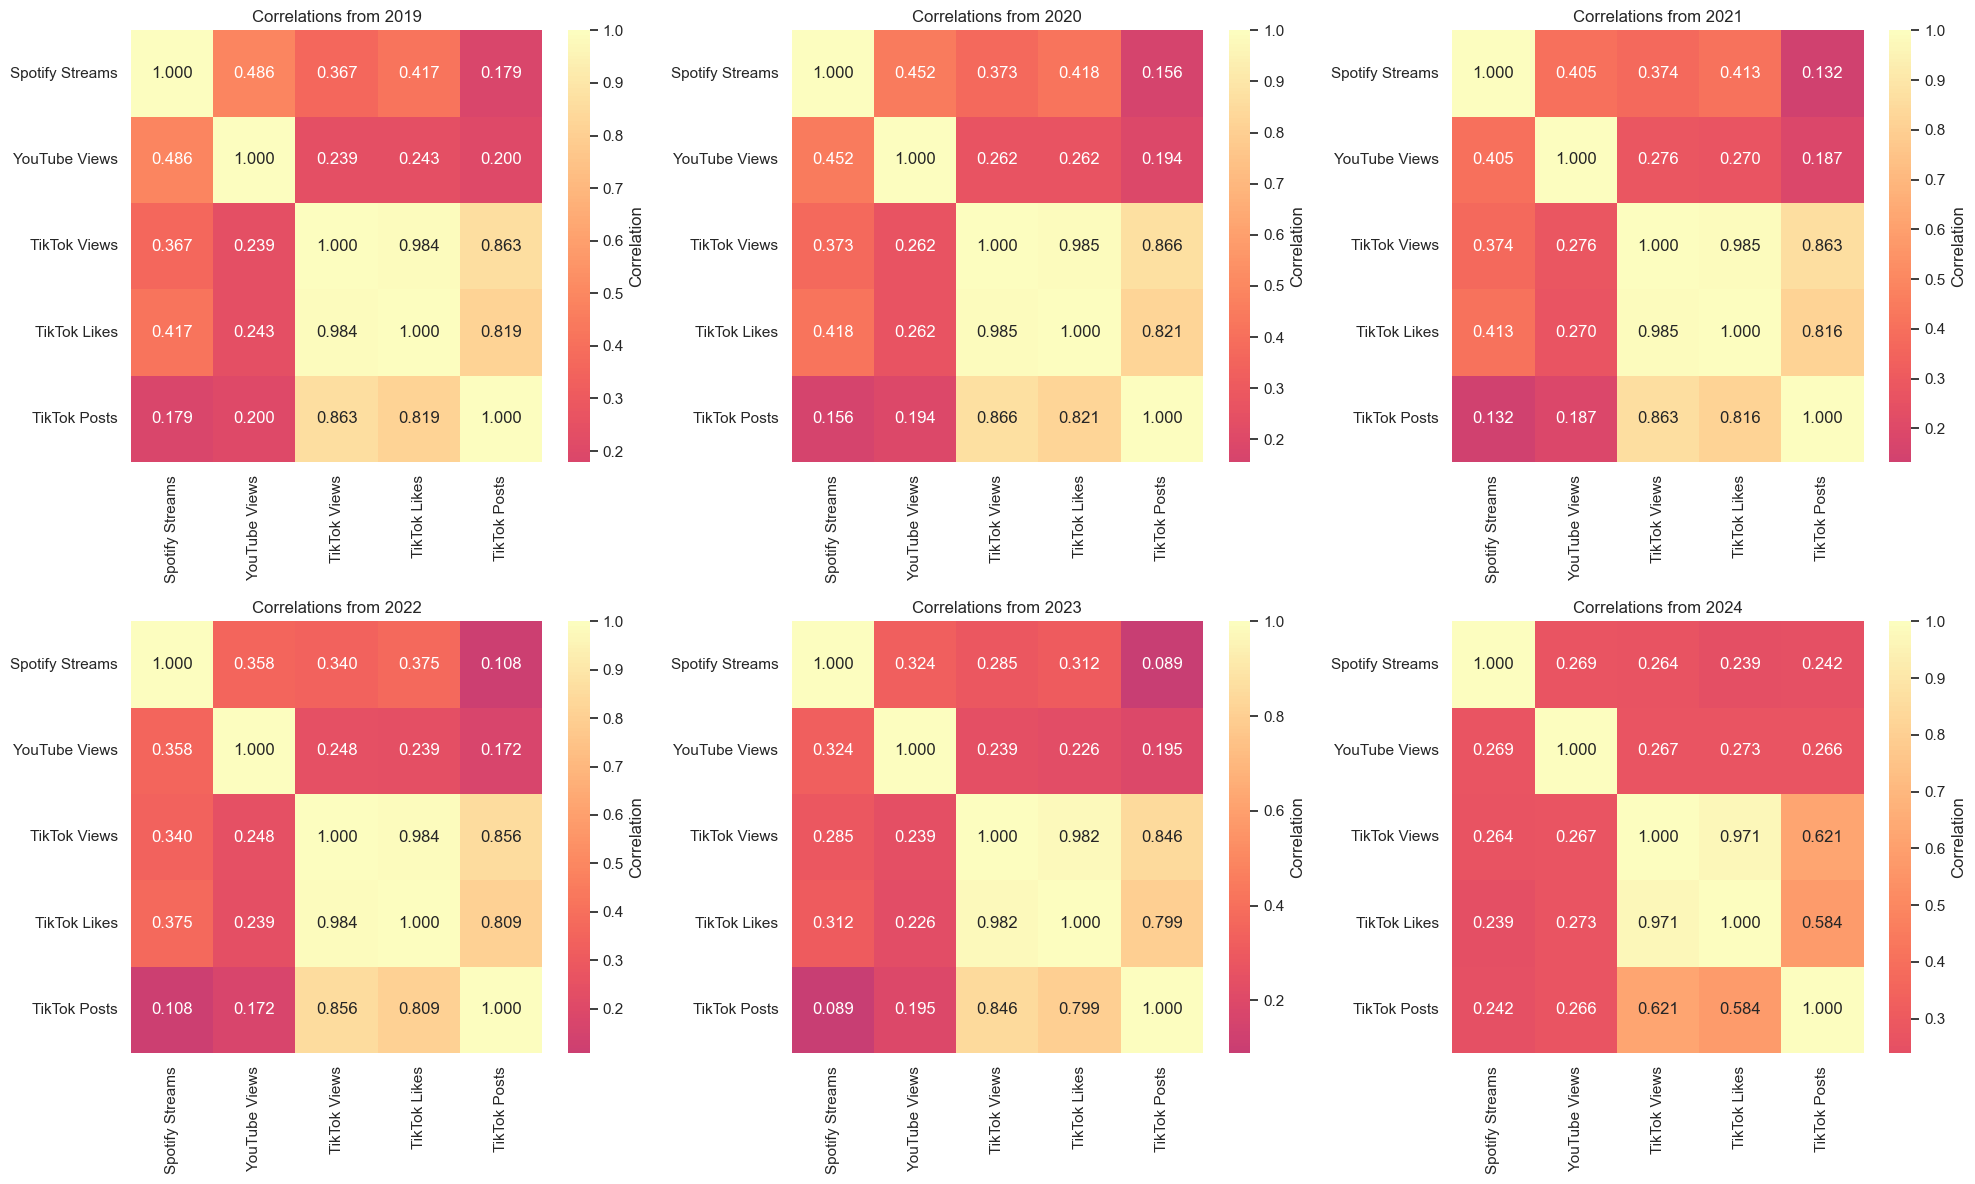

In [122]:
fig, axes=   plt.subplots(2, 3, figsize=(20,12))
corr_years=  [corr_2019, corr_2020, corr_2021, corr_2022, corr_2023, corr_2024]
year_labels= ["2019", "2020", "2021", "2022", "2023", "2024"]

for i, (corr, year_label) in enumerate(zip(corr_years, year_labels)):
  row, col= i // 3, i % 3

  sns.heatmap(corr, annot= True, fmt= ".3f", cmap= "magma",
              center= 0, ax= axes[row, col], cbar_kws= {"label": "Correlation"})
  axes[row, col].set_title(f"Correlations from {year_label}")

plt.tight_layout()
plt.show()

Based on Spearman correlation analysis, there is a moderate positive relationship between TikTok engagement and success on traditional streaming platforms (YouTube, Spotify), but this relationship is stronger for Spotify than for YouTube and has evolved significantly over time.

- **TikTok Likes** vs **Spotify Streams**: ρ = 0.382 (moderate correlation)  
- **TikTok Views** vs **Spotify Streams**: ρ = 0.323 (moderate correlation)  
- **TikTok Posts** vs **Spotify Streams**: ρ = 0.205 (weak correlation)

| Year | TikTok Likes vs Spotify Streams |
|------|----------------------------------|
| 2019 | ρ = 0.092                        |
| 2020 | ρ = 0.418                        |
| 2021 | ρ = 0.413                        |
| 2022 | ρ = 0.375                        |
| 2023 | ρ = 0.239                        |
| 2024 | ρ = 0.239                        |

> **Note**: The 2019 correlation is based on a limited number of tracks with TikTok activity, as the platform had minimal music-industry influence before 2020.

## Key Takeaways

1. **Pre-TikTok Era (2019)**: Negligible correlation (ρ ≈ 0.09)—TikTok was not yet a meaningful driver of streaming success.  
2. **TikTok as an audio discovery engine**: Stronger correlation with Spotify (ρ ≈ 0.38) than with YouTube (ρ ≈ 0.20), confirming its role in driving audio streaming.  
3. **Quality over quantity**: TikTok Likes (active user endorsement) are a better predictor than TikTok Posts (content volume).  
4. **Peak Influence (2020–2022)**: Highest correlations coincided with TikTok’s explosive global growth and pandemic-era music discovery.  
5. **Maturation & Saturation (2023–2024)**: Declining correlation suggests the ecosystem has evolved—virality alone no longer guarantees streaming success.

> **No causality implied**: This analysis reflects association, not proof that TikTok engagement causes higher streams.

## Illustrative Examples

- **High TikTok–Spotify alignment**:  
  - “MILLION DOLLAR BABY” (Tommy Richman)  
  - “i like the way you kiss me” (Artemas)  

- **Low alignment (Spotify-driven)**:  
  - “Houdini” (Eminem): High Spotify streams, minimal TikTok presence  
  - “Beautiful Things” (Benson Boone): Strong audio performance, limited TikTok data  

The sharp rise from **2019 to 2020** marks the true onset of the “TikTok effect.” The subsequent decline does not signal irrelevance, but rather a **maturing dynamic**: TikTok remains a powerful signal, but success now depends on more nuanced engagement beyond initial virality.

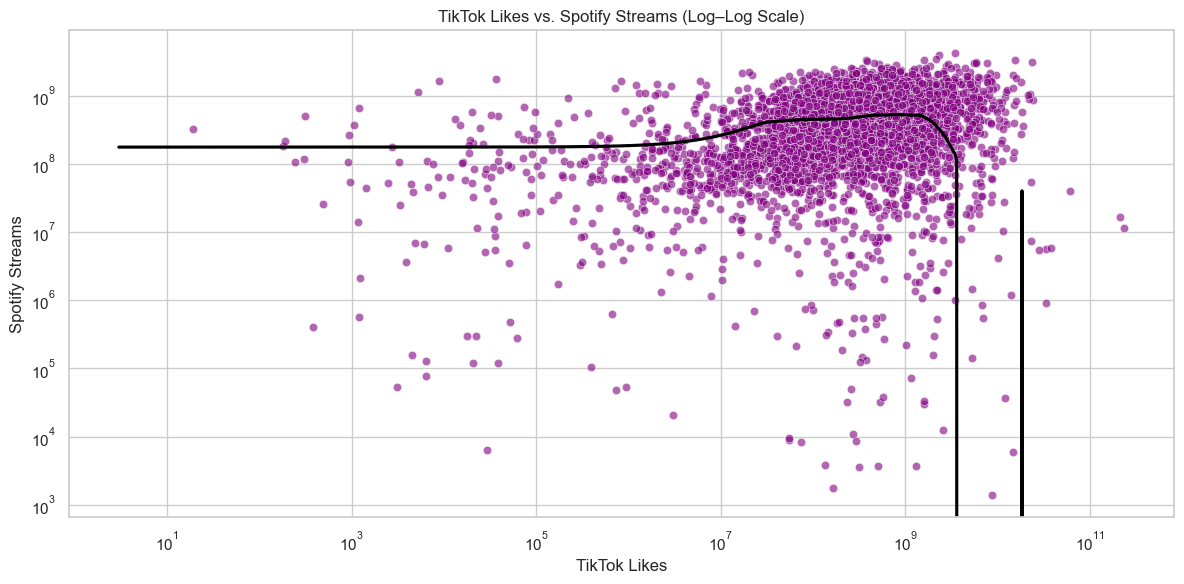

In [127]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
  data=df,
  x="TikTok Views",
  y="Spotify Streams",
  alpha=0.6,
  color="purple"
)
sns.regplot(
  data=df,
  x="TikTok Likes",
  y="Spotify Streams",
  scatter=False,
  color="black",
  lowess=True
)
plt.xscale("log")
plt.yscale("log")
plt.title("TikTok Likes vs. Spotify Streams (Log–Log Scale)")
plt.xlabel("TikTok Likes")
plt.ylabel("Spotify Streams")
plt.tight_layout()
plt.show()

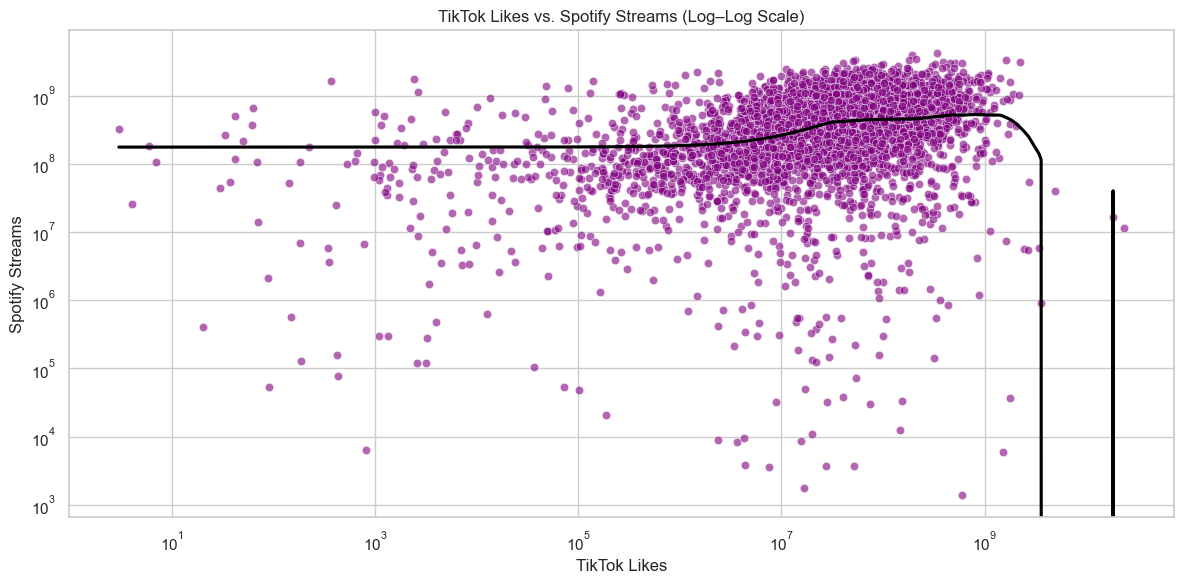

In [116]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
  data=df,
  x="TikTok Likes",
  y="Spotify Streams",
  alpha=0.6,
  color="purple"
)
sns.regplot(
  data=df,
  x="TikTok Likes",
  y="Spotify Streams",
  scatter=False,
  color="black",
  lowess=True
)
plt.xscale("log")
plt.yscale("log")
plt.title("TikTok Likes vs. Spotify Streams (Log–Log Scale)")
plt.xlabel("TikTok Likes")
plt.ylabel("Spotify Streams")
plt.tight_layout()
plt.show()

This scatterplot reveals a moderate positive association between TikTok engagement (likes) and Spotify streaming success. The LOWESS trend line shows that higher TikTok likes generally correspond to higher Spotify streams, though the relationship weakens at extreme values. Many outliers exist—some tracks achieve massive Spotify streams with minimal TikTok presence (e.g., legacy artists), while others go viral on TikTok without translating to audio streams. The log–log scale accommodates the wide range of values and highlights the non-linear, power-law nature of music consumption.

---
---

## Which artists demonstrate the most effective multi-platform presence strategies?

We want to see how the differents artist and sons prevalent throughtout the platforms, we need to normalize (we are gona use min-max scaling) because TikTok has such high values in comparassion with YouTube or Spotify, who are more "normal", so, by scaling we try to get a resutl between [0] and [1]

Then, we can compare between all the platforms and get the metrcis we want: and exit value cross-paltform

Artistas únicos con datos: 1988


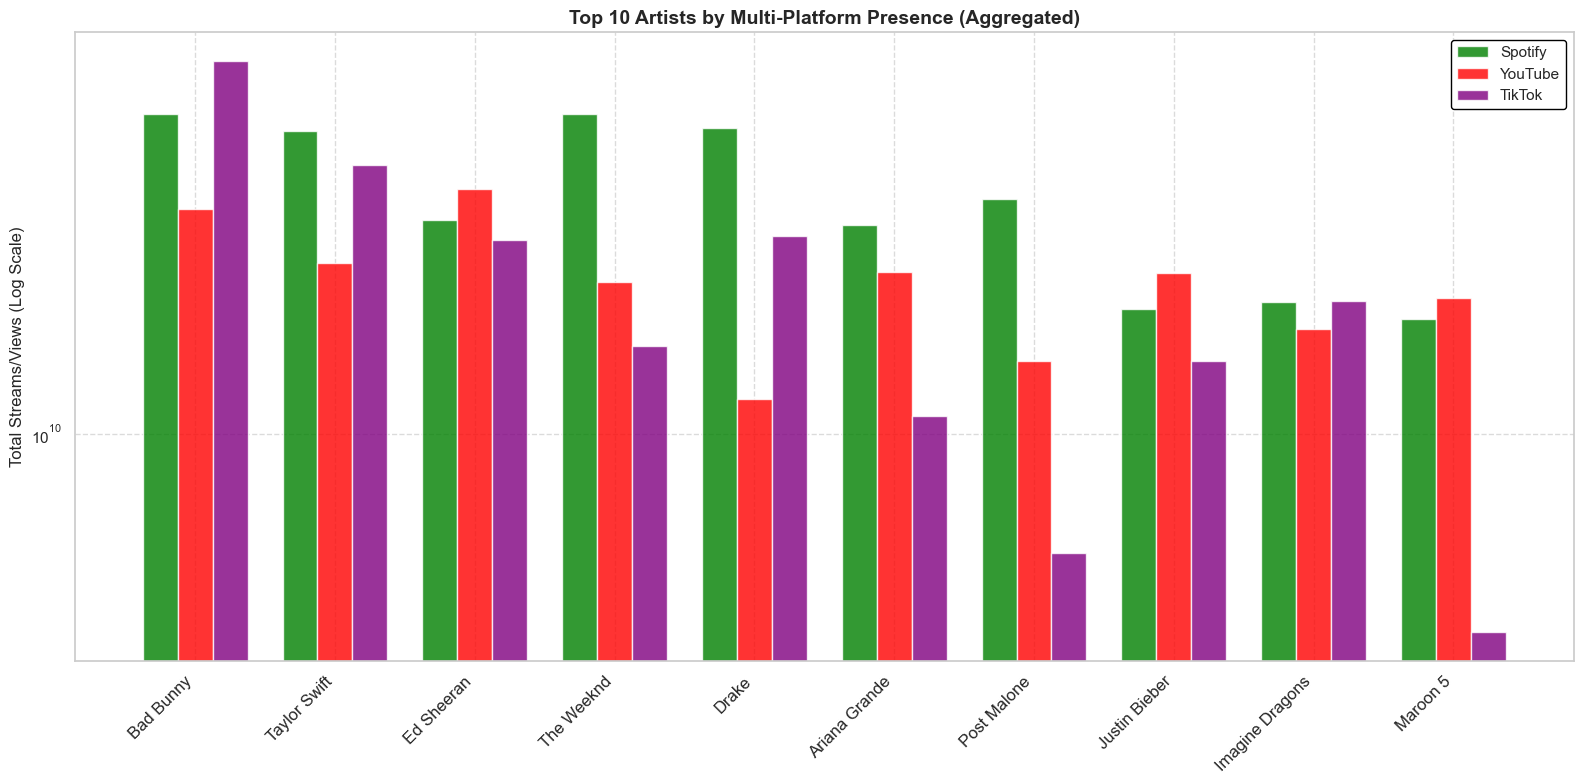

In [131]:
# <>! AI GENERATED CODE <>!
# Agrupar por artista y sumar métricas (ignorar NaN)
artist_agg = df.groupby("Artist").agg({
    "Spotify Streams": "sum",
    "YouTube Views": "sum",
    "TikTok Views": "sum",
    "Track": "count"  # número de canciones
}).rename(columns={"Track": "Song Count"}).reset_index()

# Eliminar artistas sin datos en ninguna plataforma
artist_agg = artist_agg.dropna(subset=["Spotify Streams", "YouTube Views", "TikTok Views"], how="all")

print(f"Artistas únicos con datos: {len(artist_agg)}")
artist_agg.head(3)

artist_norm = artist_agg[["Artist", "Spotify Streams", "YouTube Views", "TikTok Views"]].copy()

for col in ["Spotify Streams", "YouTube Views", "TikTok Views"]:
    artist_norm[col + "_norm"] = (artist_norm[col] - artist_norm[col].min()) / (artist_norm[col].max() - artist_norm[col].min())

# Índice de éxito multiplataforma para artistas
artist_norm["Artist_Multiplatform_Score"] = artist_norm[[
    "Spotify Streams_norm", "YouTube Views_norm", "TikTok Views_norm"
]].mean(axis=1)

# Top 10 artistas multiplataforma
top_artists_cross = artist_norm.nlargest(10, "Artist_Multiplatform_Score")
top_artists_cross.head(3)

# Preparar etiquetas
top_artists_cross["Label"] = top_artists_cross["Artist"]

fig, ax = plt.subplots(figsize=(16, 8))

x = range(len(top_artists_cross))
width = 0.25

for i in x:
    ax.bar(i - width, top_artists_cross.iloc[i]["Spotify Streams"], width, 
           color="green", alpha=0.8, label="Spotify" if i == 0 else "")
    ax.bar(i, top_artists_cross.iloc[i]["YouTube Views"], width, 
           color="red", alpha=0.8, label="YouTube" if i == 0 else "")
    ax.bar(i + width, top_artists_cross.iloc[i]["TikTok Views"], width, 
           color="purple", alpha=0.8, label="TikTok" if i == 0 else "")

ax.set_xticks(x)
ax.set_xticklabels(top_artists_cross["Label"], rotation=45, ha="right", fontsize=12)
ax.set_yscale("log")
ax.set_ylabel("Total Streams/Views (Log Scale)", fontsize=12)
ax.set_title("Top 10 Artists by Multi-Platform Presence (Aggregated)", fontsize=14, fontweight='bold')
ax.legend(loc='upper right', framealpha=1.0, facecolor='white', edgecolor='black')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [124]:
df_norm= df[["Artist", "Track", "Spotify Streams", "YouTube Views", "TikTok Views"]].copy()
df_norm= df_norm.dropna(subset= ["Spotify Streams", "YouTube Views", "TikTok Views"])
df_norm.head(3)
for c in ["Spotify Streams", "YouTube Views", "TikTok Views"]:
  df_norm[c + "_norm"]= (df_norm[c] - df_norm[c].min()) / (df_norm[c].max() - df_norm[c].min())

df_norm["Multiplatform_Score"] = df_norm[[
    "Spotify Streams_norm", "YouTube Views_norm", "TikTok Views_norm"
]].mean(axis=1)

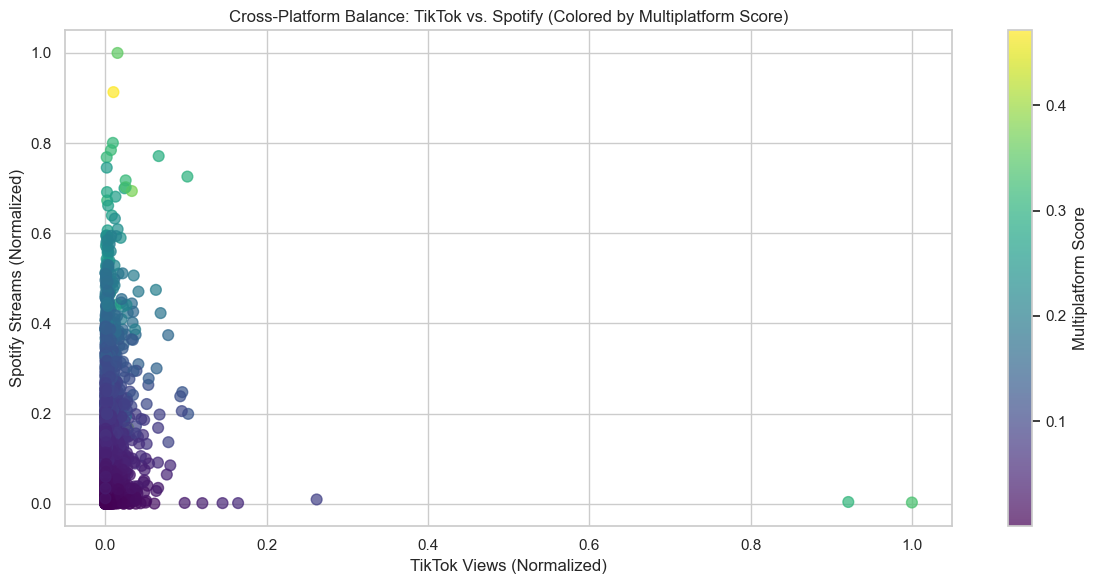

In [133]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
  df_norm["TikTok Views_norm"],
  df_norm["Spotify Streams_norm"],
  c=df_norm["Multiplatform_Score"],
  cmap="viridis",
  alpha=0.7,
  s=60
)
plt.colorbar(scatter, label="Multiplatform Score")
plt.xlabel("TikTok Views (Normalized)")
plt.ylabel("Spotify Streams (Normalized)")
plt.title("Cross-Platform Balance: TikTok vs. Spotify (Colored by Multiplatform Score)")
plt.tight_layout()
plt.show()

This plot visualizes how normalized TikTok views and Spotify streams relate across tracks, with color indicating overall multi-platform performance (including YouTube). Tracks with high multiplatform scores (yellow/green) cluster in the upper-right quadrant, indicating balanced success across platforms. In contrast, tracks with low scores (purple) dominate the edges—either strong on TikTok only (right edge) or Spotify only (top edge). The visualization confirms that effective multi-platform strategies prioritize balance over dominance on a single platform.